## Description
* Exploration of the lending_accepted_transformed.csv dataset
* Use PCA to visualize the data. 
* Train and test logistic regression model.
* Train and test a sequential network. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.decomposition import PCA

In [2]:
"""
Remove outliers using IQR (inter-quartile range) filter
"""
def iqr_filter(data, col): 
    Q1 = df.annual_inc.quantile(0.25)
    Q3 = df.annual_inc.quantile(0.75)
    IQR = Q3 - Q1
    filtered = data[(data[col] > Q1 - 1.5*IQR) & (data[col] < Q3 + 1.5*IQR)]
    print('IQR score: {}\nRemoved: {} rows'.format(IQR, len(data) - len(filtered)))
    return filtered.reset_index(drop=True)


"""
Apply min-max scaling to the specified columns. 
Return the a new data frame with the scaled features.
"""
def min_max_scale(data, cols):
    mm_scaler = MinMaxScaler() 
    scaled_array = mm_scaler.fit_transform(data[cols])
    return pd.DataFrame(scaled_array, columns=cols)

def get_means(data, cols):
    result = map(lambda x: data[x].mean(), cols) 
    return list(result)


def pca_reduce_dim(df, n_components):
    
    # Standardize the data
    x = df.drop(columns=['risk'])
    x = StandardScaler().fit_transform(x)

    # get components
    pca = PCA(n_components)
    princ_componets = pca.fit_transform(x)
    
    cols = ["pc {}".format(x) for x in range(1, n_components + 1)] 

    pca_df = pd.DataFrame(data=princ_componets, columns=cols)
    pca_df = pd.concat([pca_df, df[['risk']]], axis=1)
    return pca_df

In [3]:
path = "../lending_accepted_transformed.csv"
final_data = "../lending_accepted_transformed_final.csv"

In [4]:
df = pd.read_csv(final_data) 
df.head()

loan_amnt  int_rate  installment  annual_inc    dti  fico_range_high  \
0       4000     20.50       149.68     39000.0  16.03              674   
1       8325     23.70       325.31     60000.0  14.70              674   
2      24000     18.25       612.72    100000.0  34.79              684   
3      12000     13.98       410.02     45000.0  29.25              684   
4      16000     13.98       372.13     52000.0  21.65              724   

   inq_last_6mths  revol_bal  delinq_2yrs  open_acc  ...  total_acc  \
0               0      10026            0        12  ...         20   
1               1       6172            0        13  ...         18   
2               1      18698            0        14  ...         45   
3               0      12461            1         7  ...         15   
4               2      11151            0        13  ...         20   

   pub_rec_bankruptcies  tax_liens  term  verification_status  risk  \
0                     0          0    36                    0     1   
1                     0          0    36                    0     1   
2                     0          0    60                    1     1   
3                     0          0    36                    1     1   
4                     0          0    60                    1     1   

   current_mortgage  paid_home  rents  emp_length  
0                 0          0      1        12.0  
1                 0          0      1        12.0  
2                 0          1      0         0.5  
3                 0          0      1         9.0  
4                 0          1      0        12.0  

[5 rows x 21 columns]

In [5]:
df.describe()

loan_amnt      int_rate   installment    annual_inc           dti  \
count  1.003668e+06  1.003668e+06  1.003668e+06  1.003668e+06  1.003668e+06   
mean   1.580352e+04  1.350291e+01  4.567512e+02  8.209483e+04  1.854003e+01   
std    9.418917e+03  5.027706e+00  2.683915e+02  1.496348e+05  8.509806e+00   
min    1.000000e+03  5.310000e+00  7.610000e+00  1.900000e+03  0.000000e+00   
25%    8.900000e+03  9.930000e+00  2.635800e+02  5.000000e+04  1.217000e+01   
50%    1.400000e+04  1.288000e+01  3.878900e+02  6.900000e+04  1.810000e+01   
75%    2.100000e+04  1.629000e+01  6.023000e+02  9.757700e+04  2.463000e+01   
max    4.000000e+04  3.099000e+01  1.717630e+03  1.100000e+08  4.996000e+01   

       fico_range_high  inq_last_6mths     revol_bal   delinq_2yrs  \
count     1.003668e+06    1.003668e+06  1.003668e+06  1.003668e+06   
mean      7.014831e+02    5.403938e-01  1.709280e+04  3.151102e-01   
std       3.193539e+01    8.381131e-01  2.297135e+04  8.899758e-01   
min       6.640000e+02    0.000000e+00  0.000000e+00  0.000000e+00   
25%       6.790000e+02    0.000000e+00  6.176000e+03  0.000000e+00   
50%       6.940000e+02    0.000000e+00  1.173100e+04  0.000000e+00   
75%       7.190000e+02    1.000000e+00  2.082900e+04  0.000000e+00   
max       8.500000e+02    8.000000e+00  2.559552e+06  5.800000e+01   

           open_acc  ...     total_acc  pub_rec_bankruptcies     tax_liens  \
count  1.003668e+06  ...  1.003668e+06          1.003668e+06  1.003668e+06   
mean   1.186613e+01  ...  2.356291e+01          1.226661e-01  4.604411e-02   
std    5.866826e+00  ...  1.201201e+01          3.559959e-01  3.854353e-01   
min    0.000000e+00  ...  2.000000e+00          0.000000e+00  0.000000e+00   
25%    8.000000e+00  ...  1.500000e+01          0.000000e+00  0.000000e+00   
50%    1.100000e+01  ...  2.200000e+01          0.000000e+00  0.000000e+00   
75%    1.500000e+01  ...  3.000000e+01          0.000000e+00  0.000000e+00   
max    1.010000e+02  ...  1.760000e+02          1.100000e+01  8.500000e+01   

               term  verification_status          risk  current_mortgage  \
count  1.003668e+06         1.003668e+06  1.003668e+06      1.003668e+06   
mean   4.481285e+01         6.696029e-01  2.693351e-01      4.607769e-01   
std    1.156902e+01         4.703563e-01  4.436146e-01      4.984594e-01   
min    3.600000e+01         0.000000e+00  0.000000e+00      0.000000e+00   
25%    3.600000e+01         0.000000e+00  0.000000e+00      0.000000e+00   
50%    3.600000e+01         1.000000e+00  0.000000e+00      0.000000e+00   
75%    6.000000e+01         1.000000e+00  1.000000e+00      1.000000e+00   
max    6.000000e+01         1.000000e+00  1.000000e+00      1.000000e+00   

          paid_home         rents    emp_length  
count  1.003668e+06  1.003668e+06  1.003668e+06  
mean   1.111742e-01  4.280489e-01  6.698974e+00  
std    3.143479e-01  4.947962e-01  4.473434e+00  
min    0.000000e+00  0.000000e+00  5.000000e-01  
25%    0.000000e+00  0.000000e+00  2.000000e+00  
50%    0.000000e+00  0.000000e+00  6.000000e+00  
75%    0.000000e+00  1.000000e+00  1.200000e+01  
max    1.000000e+00  1.000000e+00  1.200000e+01  

[8 rows x 21 columns]

In [6]:
print(df.columns)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'fico_range_high', 'inq_last_6mths', 'revol_bal', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies', 'tax_liens',
       'term', 'verification_status', 'risk', 'current_mortgage', 'paid_home',
       'rents', 'emp_length'],
      dtype='object')


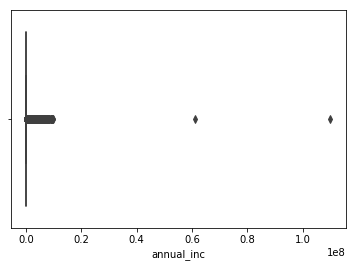

In [7]:
# Annual income heavily affected by outliers 
sns.boxplot(x=df.annual_inc)

IQR score: 47577.0
Removed: 52882 rows


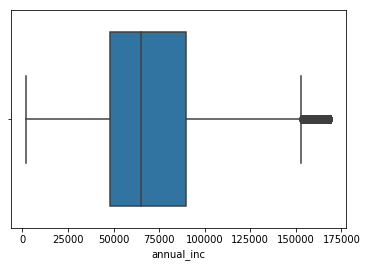

In [8]:
df = iqr_filter(df, 'annual_inc')
sns.boxplot(x=df.annual_inc)

## Risky/Not Rsiky loans distribution

Risky loans:  261201
Non risky loans:  689585


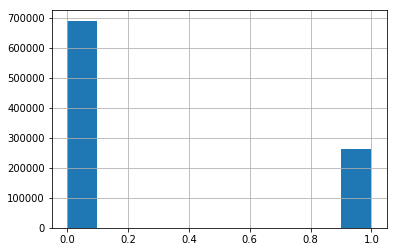

In [9]:
# Data is heavily biased. There are 1843414 non-risky loans vs 292608 risky ones. 
# This means that we'll have to be careful about selecting data for classification
# we need to make sure both classes are well represented. 

# rows of loans classified as risky
risky_df = df[df.risk == 1].reset_index(drop=True)

# rows of loans classified as non risky
non_risky_df = df[df.risk == 0].reset_index(drop=True)

print("Risky loans: ", len(risky_df))
print("Non risky loans: ", len(non_risky_df))

df.risk.hist()

## Get Sample

Since the data is skewed biased towards not risky loans, we generate a dataset containing all 292608 risky loans plus 292608 non-risky loans chosen randomly.

In [10]:
# risky_df = risky_df.sample(n=100_000)
non_risky_df = non_risky_df.sample(n=len(risky_df), random_state=1)
non_risky_df.describe()

loan_amnt       int_rate    installment     annual_inc  \
count  261201.000000  261201.000000  261201.000000  261201.000000   
mean    15121.239390      12.771288     432.430538   73886.069702   
std      9196.709861       4.820598     256.559743   32646.664219   
min      1000.000000       5.310000      30.120000    2300.000000   
25%      8000.000000       9.440000     250.290000   50000.000000   
50%     13000.000000      11.990000     366.980000   68000.000000   
75%     20000.000000      15.310000     566.560000   94000.000000   
max     40000.000000      30.990000    1618.030000  168900.000000   

                 dti  fico_range_high  inq_last_6mths      revol_bal  \
count  261201.000000    261201.000000   261201.000000  261201.000000   
mean       18.432877       704.728948        0.448275   15811.452315   
std         8.452924        33.179170        0.741840   17208.651210   
min         0.000000       664.000000        0.000000       0.000000   
25%        12.120000       679.000000        0.000000    6007.000000   
50%        17.960000       699.000000        0.000000   11448.000000   
75%        24.440000       724.000000        1.000000   20075.000000   
max        49.860000       850.000000        6.000000  589281.000000   

         delinq_2yrs       open_acc  ...      total_acc  pub_rec_bankruptcies  \
count  261201.000000  261201.000000  ...  261201.000000         261201.000000   
mean        0.292641      11.634756  ...      22.721245              0.116504   
std         0.866328       5.830647  ...      11.741679              0.342317   
min         0.000000       0.000000  ...       2.000000              0.000000   
25%         0.000000       8.000000  ...      14.000000              0.000000   
50%         0.000000      11.000000  ...      21.000000              0.000000   
75%         0.000000      15.000000  ...      29.000000              0.000000   
max        58.000000      97.000000  ...     160.000000              7.000000   

           tax_liens           term  verification_status      risk  \
count  261201.000000  261201.000000        261201.000000  261201.0   
mean        0.037174      44.448298             0.622976       0.0   
std         0.319438      11.462370             0.484642       0.0   
min         0.000000      36.000000             0.000000       0.0   
25%         0.000000      36.000000             0.000000       0.0   
50%         0.000000      36.000000             1.000000       0.0   
75%         0.000000      60.000000             1.000000       0.0   
max        29.000000      60.000000             1.000000       0.0   

       current_mortgage      paid_home          rents     emp_length  
count     261201.000000  261201.000000  261201.000000  261201.000000  
mean           0.461277       0.113771       0.424952       6.722453  
std            0.498499       0.317533       0.494337       4.490698  
min            0.000000       0.000000       0.000000       0.500000  
25%            0.000000       0.000000       0.000000       2.000000  
50%            0.000000       0.000000       0.000000       6.000000  
75%            1.000000       0.000000       1.000000      12.000000  
max            1.000000       1.000000       1.000000      12.000000  

[8 rows x 21 columns]

In [11]:
risky_df.describe()

loan_amnt       int_rate    installment     annual_inc  \
count  261201.000000  261201.000000  261201.000000  261201.000000   
mean    15583.671387      15.737420     463.844959   67635.085291   
std      8658.652052       4.909747     256.737024   30218.627067   
min      1000.000000       5.310000       7.610000    2400.000000   
25%      9275.000000      12.290000     278.920000   45000.000000   
50%     14400.000000      15.050000     404.270000   61000.000000   
75%     20125.000000      18.550000     600.690000   85000.000000   
max     40000.000000      30.990000    1715.420000  168847.000000   

                 dti  fico_range_high  inq_last_6mths      revol_bal  \
count  261201.000000    261201.000000   261201.000000  261201.000000   
mean       19.848246       691.615063        0.765169   14772.471920   
std         8.513405        25.519907        1.000892   15494.266845   
min         0.000000       664.000000        0.000000       0.000000   
25%        13.580000       674.000000        0.000000    6001.000000   
50%        19.670000       684.000000        0.000000   11044.000000   
75%        26.060000       704.000000        1.000000   18850.000000   
max        49.920000       850.000000        8.000000  893598.000000   

         delinq_2yrs       open_acc  ...      total_acc  pub_rec_bankruptcies  \
count  261201.000000  261201.000000  ...  261201.000000         261201.000000   
mean        0.355179      11.951233  ...      24.541453              0.148897   
std         0.947108       5.652499  ...      12.069772              0.400617   
min         0.000000       0.000000  ...       2.000000              0.000000   
25%         0.000000       8.000000  ...      16.000000              0.000000   
50%         0.000000      11.000000  ...      23.000000              0.000000   
75%         0.000000      15.000000  ...      31.000000              0.000000   
max        36.000000      76.000000  ...     176.000000             11.000000   

           tax_liens           term  verification_status      risk  \
count  261201.000000  261201.000000        261201.000000  261201.0   
mean        0.056225      45.715185             0.766544       1.0   
std         0.444217      11.780499             0.423031       0.0   
min         0.000000      36.000000             0.000000       1.0   
25%         0.000000      36.000000             1.000000       1.0   
50%         0.000000      36.000000             1.000000       1.0   
75%         0.000000      60.000000             1.000000       1.0   
max        85.000000      60.000000             1.000000       1.0   

       current_mortgage      paid_home          rents     emp_length  
count     261201.000000  261201.000000  261201.000000  261201.000000  
mean           0.420998       0.105007       0.473995       6.593838  
std            0.493720       0.306563       0.499324       4.419744  
min            0.000000       0.000000       0.000000       0.500000  
25%            0.000000       0.000000       0.000000       2.000000  
50%            0.000000       0.000000       0.000000       6.000000  
75%            1.000000       0.000000       1.000000      12.000000  
max            1.000000       1.000000       1.000000      12.000000  

[8 rows x 21 columns]

In [12]:
df = pd.concat([risky_df, non_risky_df]).reset_index(drop=True)
df.describe()

loan_amnt       int_rate    installment     annual_inc  \
count  522402.000000  522402.000000  522402.000000  522402.000000   
mean    15352.455389      14.254354     448.137749   70760.577497   
std      8934.717234       5.086387     257.128356   31610.945562   
min      1000.000000       5.310000       7.610000    2300.000000   
25%      8600.000000      10.650000     264.500000   47000.000000   
50%     14000.000000      13.660000     385.410000   65000.000000   
75%     20000.000000      17.270000     584.960000   90000.000000   
max     40000.000000      30.990000    1715.420000  168900.000000   

                 dti  fico_range_high  inq_last_6mths      revol_bal  \
count  522402.000000    522402.000000   522402.000000  522402.000000   
mean       19.140562       698.172005        0.606722   15291.962117   
std         8.512677        30.315894        0.895075   16382.135030   
min         0.000000       664.000000        0.000000       0.000000   
25%        12.810000       674.000000        0.000000    6004.000000   
50%        18.810000       689.000000        0.000000   11244.000000   
75%        25.280000       714.000000        1.000000   19462.000000   
max        49.920000       850.000000        8.000000  893598.000000   

         delinq_2yrs       open_acc  ...      total_acc  pub_rec_bankruptcies  \
count  522402.000000  522402.000000  ...  522402.000000         522402.000000   
mean        0.323910      11.792995  ...      23.631349              0.132700   
std         0.908155       5.744438  ...      11.941576              0.372961   
min         0.000000       0.000000  ...       2.000000              0.000000   
25%         0.000000       8.000000  ...      15.000000              0.000000   
50%         0.000000      11.000000  ...      22.000000              0.000000   
75%         0.000000      15.000000  ...      30.000000              0.000000   
max        58.000000      97.000000  ...     176.000000             11.000000   

           tax_liens           term  verification_status      risk  \
count  522402.000000  522402.000000        522402.000000  522402.0   
mean        0.046700      45.081742             0.694760       0.5   
std         0.387008      11.639761             0.460509       0.5   
min         0.000000      36.000000             0.000000       0.0   
25%         0.000000      36.000000             0.000000       0.0   
50%         0.000000      36.000000             1.000000       0.5   
75%         0.000000      60.000000             1.000000       1.0   
max        85.000000      60.000000             1.000000       1.0   

       current_mortgage      paid_home          rents     emp_length  
count     522402.000000  522402.000000  522402.000000  522402.000000  
mean           0.441137       0.109389       0.449474       6.658145  
std            0.496524       0.312127       0.497441       4.455822  
min            0.000000       0.000000       0.000000       0.500000  
25%            0.000000       0.000000       0.000000       2.000000  
50%            0.000000       0.000000       0.000000       6.000000  
75%            1.000000       0.000000       1.000000      12.000000  
max            1.000000       1.000000       1.000000      12.000000  

[8 rows x 21 columns]

## Compare means

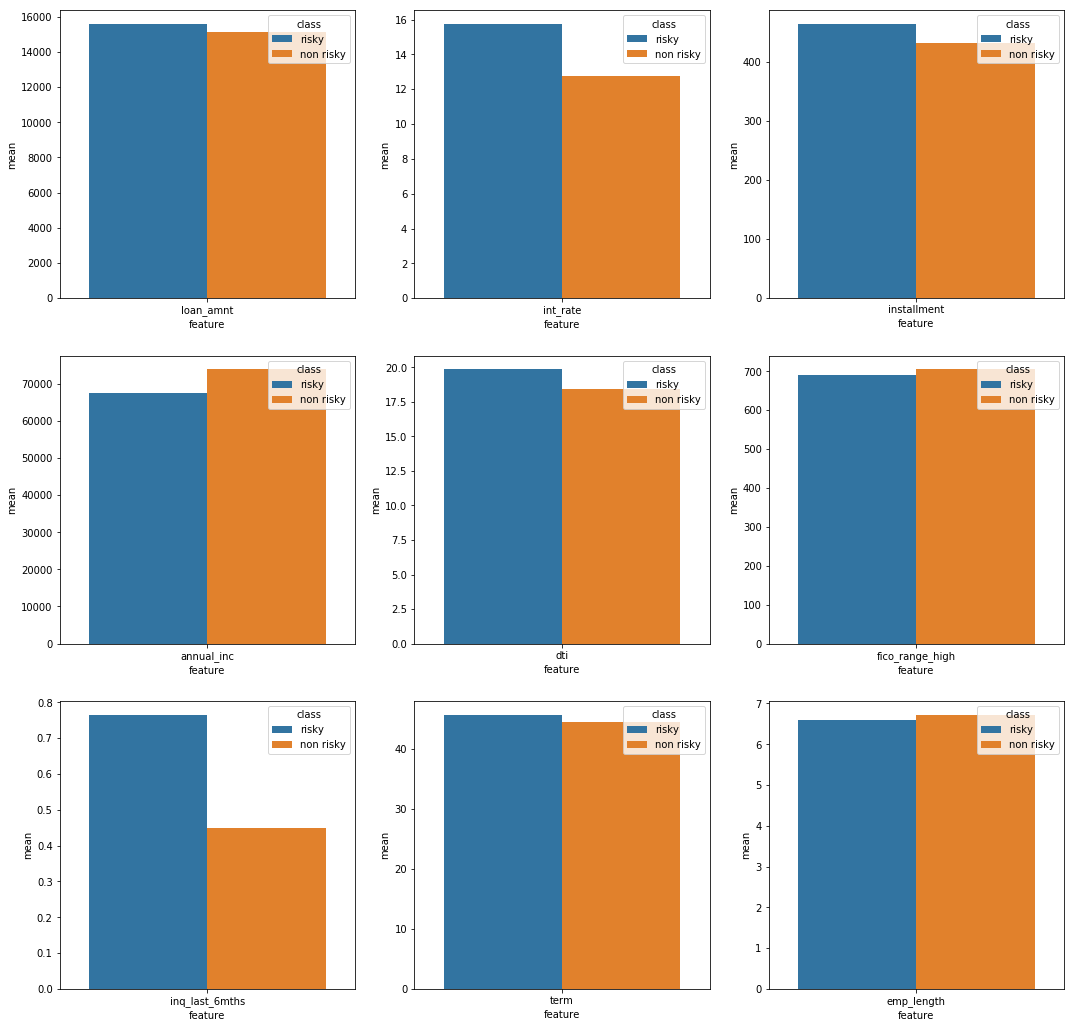

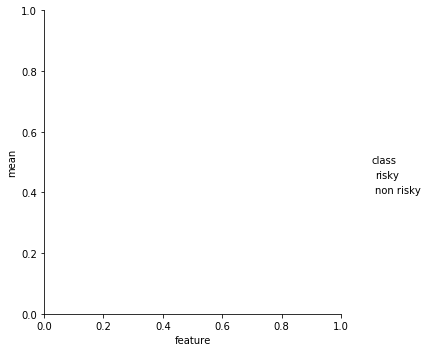

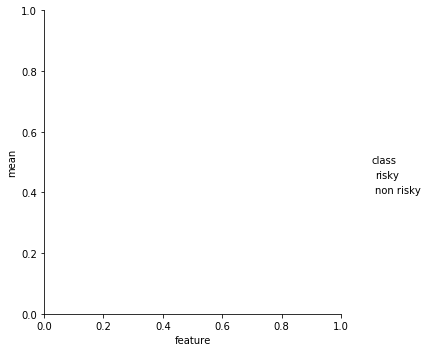

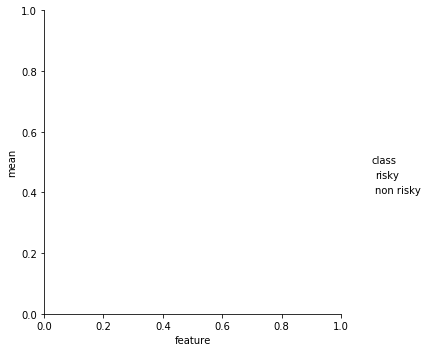

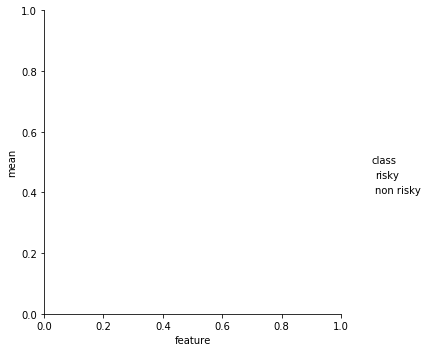

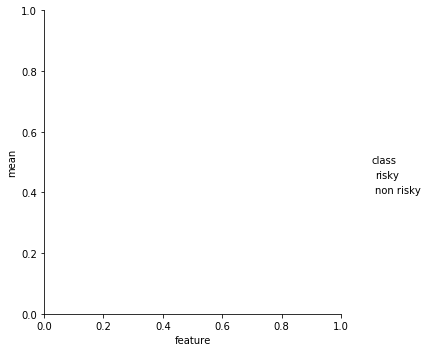

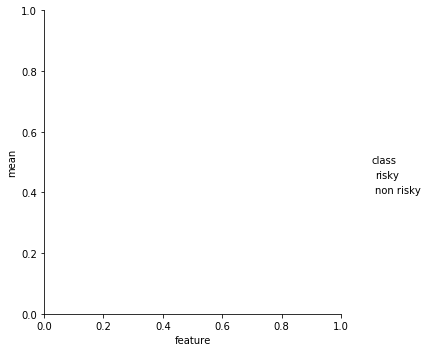

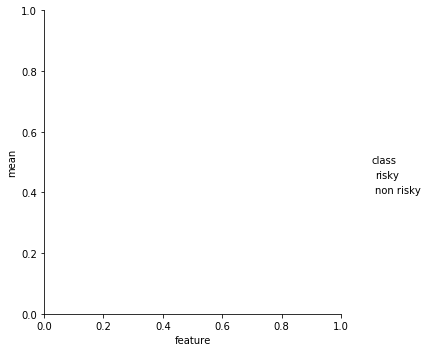

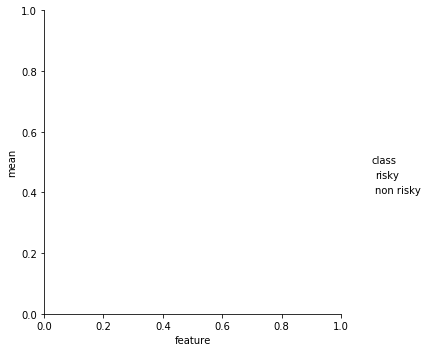

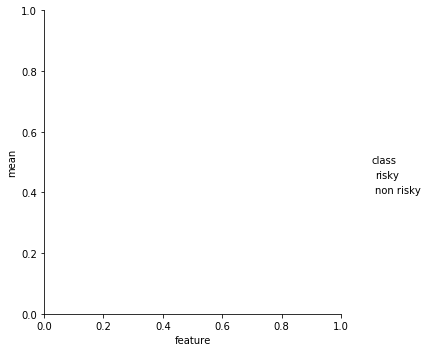

In [13]:
def get_feature(feature):
    return means_df[means_df.feature == feature]

feat = ['loan_amnt', 'int_rate',  'installment', 'annual_inc', 'dti', 
        'fico_range_high', 'inq_last_6mths', 'term', 'emp_length']

means_risky = get_means(risky_df, feat)
means_non_risky = get_means(non_risky_df, feat)

means_df = pd.DataFrame({'class': ['risky']*len(feat) + ['non risky']*len(feat), 
                         'feature': feat*2,
                         'mean': means_risky+means_non_risky})

# for feature in feat:
#     sns_fig = sns.catplot(x='feature', y='mean', hue='class', data=get_feature(feature), kind='bar')
##     sns_fig.fig.savefig('{}.png'.format(feature))
    
    
n_rows=3
n_columns=3
fig, axes = plt.subplots(n_rows, n_columns, figsize=(6*n_rows,6*n_columns))
for i in range(len(feat)):
    feature = feat[i]
    r = int(i/n_rows)
    c = i%n_columns
    sns.catplot(x='feature', y='mean', hue='class', data=get_feature(feature), kind='bar', ax=axes[r,c])


In [14]:
means_df = df.copy()
means_df['class'] = means_df.risk.apply(lambda x: 'risky' if x == 1 else 'non-risky')
means_table = pd.pivot_table(means_df, index='class', values=feat, aggfunc=np.mean)
means_table

annual_inc        dti  emp_length  fico_range_high  \
class                                                             
non-risky  73886.069702  18.432877    6.722453       704.728948   
risky      67635.085291  19.848246    6.593838       691.615063   

           inq_last_6mths  installment   int_rate     loan_amnt       term  
class                                                                       
non-risky        0.448275   432.430538  12.771288  15121.239390  44.448298  
risky            0.765169   463.844959  15.737420  15583.671387  45.715185

## Compare distributions

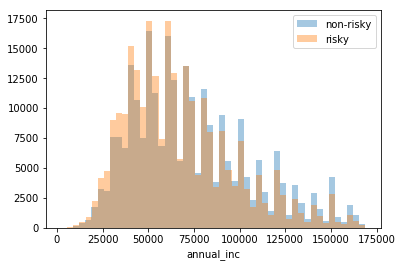

In [15]:
# Annual income distribution for risky and non-risky loans is similar. 

sns.distplot(non_risky_df.annual_inc, kde=False, label='non-risky')
sns.distplot(risky_df.annual_inc, kde=False, label='risky')
plt.legend()

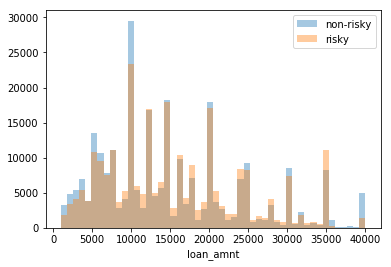

In [16]:
# Loan amount
# Distribution is similar for risky and non-risky

sns.distplot(non_risky_df.loan_amnt, kde=False, label='non-risky')
sns.distplot(risky_df.loan_amnt,kde=False, label='risky')
plt.legend()

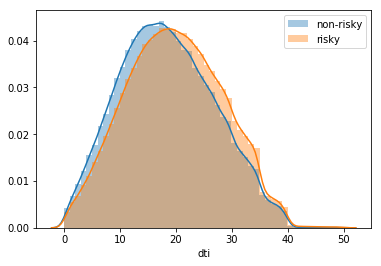

In [17]:
# Debt to income ratio
# Debt to income ratio curve for risky loans is shifted to the right, meaning that as a group, they incur
# in highest dti ratio. This fature may be a good predictor.  

sns.distplot(non_risky_df.dti, kde=True, label='non-risky')
sns.distplot(risky_df.dti,kde=True, label='risky')
plt.legend()

Fico score ranges (from [experian.com](https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/)) 

300-579	Very Poor

580-669	Fair 

670-739	Good

740-799 Very Good

800-850 Exceptional

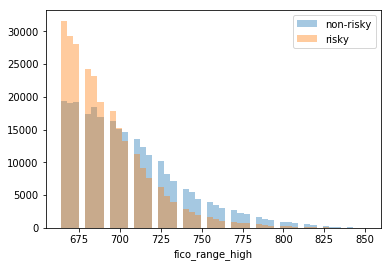

In [18]:
# Fico score distributions

sns.distplot(non_risky_df.fico_range_high, kde=False, label='non-risky')
sns.distplot(risky_df.fico_range_high, kde=False, label='risky')
plt.legend()

rating      class   count
0    very_poor  non-risky       0
1         fair  non-risky   38408
2         good  non-risky  186660
3    very_good  non-risky   32746
4  exceptional  non-risky    3387
5    very_poor      risky       0
6         fair      risky   60946
7         good      risky  187193
8    very_good      risky   12282
9  exceptional      risky     780

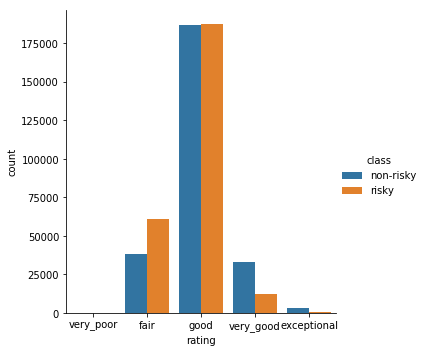

In [19]:
# Fico score distribution by credit rating
# No accepted loan had poor credit rating
# Both, non-risky and risky loans have very similar distribution for 'good credit' rating. 
# However, there are some differences in the fair credit category, showing a higher number of risky loans
# while a larger number of non-risky loans fall under the very good and exceptional credit ratings. 
# Since the bulk of the sample falls in the good category, and both classes are evenly distributed in this category,
# maybe the FICO score will not have a very high predicting value. 

very_poor = (non_risky_df[non_risky_df.fico_range_high <= 579], 
             risky_df[risky_df.fico_range_high <= 579])

fair = (non_risky_df[(non_risky_df.fico_range_high > 579) & (non_risky_df.fico_range_high <= 669)], 
        risky_df[(risky_df.fico_range_high > 579) & (risky_df.fico_range_high <= 669)])

good = (non_risky_df[(non_risky_df.fico_range_high > 669) & (non_risky_df.fico_range_high <= 739)], 
        risky_df[(risky_df.fico_range_high > 669) & (risky_df.fico_range_high <= 739)])

very_good = (non_risky_df[(non_risky_df.fico_range_high >= 740) & (non_risky_df.fico_range_high <= 799)], 
             risky_df[(risky_df.fico_range_high >= 740) & (risky_df.fico_range_high <= 799)])

exceptional = (non_risky_df[non_risky_df.fico_range_high >= 800], 
               risky_df[risky_df.fico_range_high >= 800])

# create a data frame to use with seaborn catplot
rating=['very_poor', 'fair', 'good', 'very_good', 'exceptional']
bar_df = pd.DataFrame({'rating':rating*2, 
                       'class':['non-risky']*5 + ['risky']*5, 
                       'count': [len(very_poor[0]), len(fair[0]), len(good[0]), len(very_good[0]), len(exceptional[0]),
                                 len(very_poor[1]), len(fair[1]), len(good[1]), len(very_good[1]), len(exceptional[1])]})

sns.catplot(x='rating', y='count', hue='class', data=bar_df, kind='bar')
bar_df

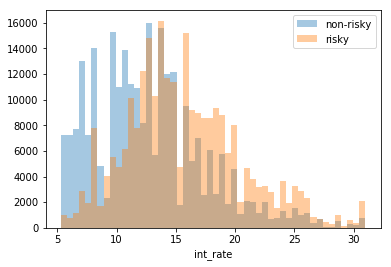

In [20]:
# interest rate distribution 
# Non-risky loans show the lowest interest rates. 

sns.distplot(non_risky_df.int_rate, kde=False, label='non-risky')
sns.distplot(risky_df.int_rate, kde=False, label='risky')
plt.legend()

In [21]:
# Loan Term
term_df = df.copy()
term_df['class'] = term_df.risk.apply(lambda x: 'risky' if x == 1 else 'non-risky')
term_table = pd.pivot_table(term_df, index='term', columns=['class'], values='risk', aggfunc=len)
term_table

class  non-risky   risky
term                    
36        169255  155467
60         91946  105734

In [22]:
# Hause ownership status

home_own_df = df.copy()
home_own_df['class'] = df.risk.apply(lambda x: 'risky' if x == 1 else 'non-risky')
home_own_table = pd.pivot_table(home_own_df, index='class', 
                                values=['current_mortgage', 'paid_home', 'rents'], aggfunc=sum)

home_own_table

current_mortgage  paid_home   rents
class                                         
non-risky            120486      29717  110998
risky                109965      27428  123808

## Pre-processing

### Remove outliers for annual income


In [23]:
df.annual_inc.describe()

count    522402.000000
mean      70760.577497
std       31610.945562
min        2300.000000
25%       47000.000000
50%       65000.000000
75%       90000.000000
max      168900.000000
Name: annual_inc, dtype: float64

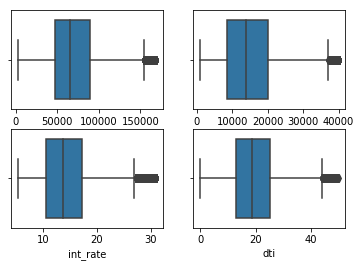

In [24]:
# box plot
fig, axes = plt.subplots(2, 2)
ax = sns.boxplot(x=df.annual_inc, ax=axes[0,0])
ax = sns.boxplot(x=df.loan_amnt, ax=axes[0,1])
ax = sns.boxplot(x=df.int_rate, ax=axes[1,0])
ax = sns.boxplot(x=df.dti, ax=axes[1,1])

## PCA for visualization

In [25]:
# Standardize the data
X = df.drop(columns=['risk'])
X = StandardScaler().fit_transform(X)

In [26]:
pca = PCA(n_components=3)
princ_componets = pca.fit_transform(X)
princ_df = pd.DataFrame(data=princ_componets, columns=['pc 1', 'pc 2', 'pc 3'])
princ_df.head()

pc 1      pc 2      pc 3
0 -2.190836 -0.123173 -0.259445
1 -1.474584  0.272035 -0.783644
2  2.174669  0.543132 -1.263437
3 -1.443362 -0.081680 -1.151073
4  0.230811 -0.181265 -0.225612

In [27]:
princ_df = pd.concat([princ_df, df[['risk']]], axis=1)
princ_df.head()

pc 1      pc 2      pc 3  risk
0 -2.190836 -0.123173 -0.259445     1
1 -1.474584  0.272035 -0.783644     1
2  2.174669  0.543132 -1.263437     1
3 -1.443362 -0.081680 -1.151073     1
4  0.230811 -0.181265 -0.225612     1

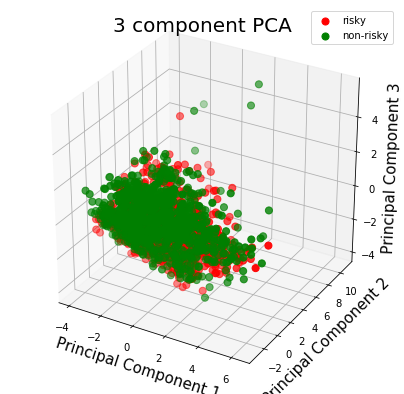

In [28]:
sample_df = princ_df.copy()
sample_df['risk'] = sample_df.risk.apply(lambda x: 'risky' if x == 1 else 'non-risky')
sample_df = pd.concat([sample_df[:1000], sample_df[-1000:]])

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)
targets = ['risky', 'non-risky']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = sample_df['risk'] == target
    ax.scatter(sample_df.loc[indicesToKeep, 'pc 1']
               , sample_df.loc[indicesToKeep, 'pc 2']
               , sample_df.loc[indicesToKeep, 'pc 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Models

### Logistic Regression

In [29]:
target = df.risk
X = df.drop(columns=['risk'])

# Apply min-max scale
X = min_max_scale(X, X.columns)
X.head()

loan_amnt  int_rate  installment  annual_inc       dti  fico_range_high  \
0   0.076923  0.591511     0.083188    0.220288  0.321114         0.053763   
1   0.187821  0.716121     0.186028    0.346339  0.294471         0.053763   
2   0.589744  0.503894     0.354319    0.586435  0.696915         0.107527   
3   0.282051  0.337617     0.235629    0.256303  0.585938         0.107527   
4   0.384615  0.337617     0.213443    0.298319  0.433694         0.322581   

   inq_last_6mths  revol_bal  delinq_2yrs  open_acc  pub_rec  total_acc  \
0           0.000   0.011220     0.000000  0.123711      0.0   0.103448   
1           0.125   0.006907     0.000000  0.134021      0.0   0.091954   
2           0.125   0.020924     0.000000  0.144330      0.0   0.247126   
3           0.000   0.013945     0.017241  0.072165      0.0   0.074713   
4           0.250   0.012479     0.000000  0.134021      0.0   0.103448   

   pub_rec_bankruptcies  tax_liens  term  verification_status  \
0                   0.0        0.0   0.0                  0.0   
1                   0.0        0.0   0.0                  0.0   
2                   0.0        0.0   1.0                  1.0   
3                   0.0        0.0   0.0                  1.0   
4                   0.0        0.0   1.0                  1.0   

   current_mortgage  paid_home  rents  emp_length  
0               0.0        0.0    1.0     1.00000  
1               0.0        0.0    1.0     1.00000  
2               0.0        1.0    0.0     0.00000  
3               0.0        0.0    1.0     0.73913  
4               0.0        1.0    0.0     1.00000

In [30]:
# training/testing set split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=2)
print('Train set size: {}\nTest set size: {}'.format(len(X_train), len(X_test)))

Train set size: 417921
Test set size: 104481


In [31]:
log_model = LogisticRegression(verbose=1, fit_intercept=False)
log_model.fit(X_train, y_train)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)

In [32]:
# Model accuracy 

log_model.score(X_test, y_test)

0.6542624974875815

In [33]:
y_pred = log_model.predict(X_test)
target_names = ['No Risk', 'Risk']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     No Risk       0.66      0.65      0.65     52337
        Risk       0.65      0.65      0.65     52144

    accuracy                           0.65    104481
   macro avg       0.65      0.65      0.65    104481
weighted avg       0.65      0.65      0.65    104481



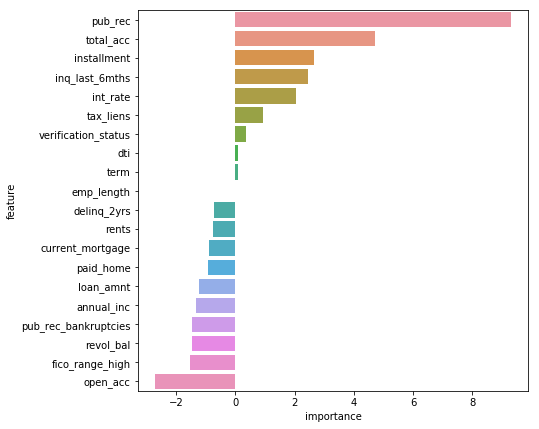

In [39]:
# Feature importances
imp_df = pd.DataFrame(zip(np.hstack(log_model.coef_.T), X_train.columns), columns=['importance', 'feature'])#.sort_values(by='coeff')
# imp_df.importance = imp_df.importance.apply(lambda x: abs(x))
imp_df = imp_df.sort_values('importance', ascending=False)

fig, ax = plt.subplots(figsize=(7,7))
sns_fig = sns.barplot(x='importance', y='feature', data=imp_df)

## Sequential Network

In [35]:
import torch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


In [36]:
num_features=len(X_train.columns)
def SeqNet():
    model = Sequential()
    model.add(Dense(128, input_dim=num_features, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [37]:
model = SeqNet()
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2688      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 19,329
Trainable params: 19,329
Non-trainable params: 0
_________________________________________________________________


In [38]:
batch_size=128 
epochs=100
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
417921/417921 [==============================] - 9s 22us/sample - loss: 0.6141 - acc: 0.6598
Epoch 2/100
417921/417921 [==============================] - 8s 18us/sample - loss: 0.6065 - acc: 0.6672
Epoch 3/100
417921/417921 [==============================] - 9s 22us/sample - loss: 0.6046 - acc: 0.6685
Epoch 4/100
417921/417921 [==============================] - 7s 17us/sample - loss: 0.6035 - acc: 0.6698
Epoch 5/100
417921/417921 [==============================] - 8s 19us/sample - loss: 0.6029 - acc: 0.6704
Epoch 6/100
417921/417921 [==============================] - 9s 22us/sample - loss: 0.6018 - acc: 0.6719
Epoch 7/100
417921/417921 [==============================] - 9s 21us/sample - loss: 0.6011 - acc: 0.6718
Epoch 8/100
417921/417921 [==============================] - 9s 21us/sample - loss: 0.6002 - acc: 0.6728
Epoch 9/100
417921/417921 [==============================] - 8s 20us/sample - loss: 0.5992 - acc: 0.6738
Epoch 1

Epoch 76/100
417921/417921 [==============================] - 6s 15us/sample - loss: 0.5801 - acc: 0.6896
Epoch 77/100
417921/417921 [==============================] - 7s 17us/sample - loss: 0.5795 - acc: 0.6894
Epoch 78/100
417921/417921 [==============================] - 8s 18us/sample - loss: 0.5795 - acc: 0.6895
Epoch 79/100
417921/417921 [==============================] - 7s 17us/sample - loss: 0.5794 - acc: 0.6899
Epoch 80/100
417921/417921 [==============================] - 7s 16us/sample - loss: 0.5792 - acc: 0.6899
Epoch 81/100
417921/417921 [==============================] - 7s 16us/sample - loss: 0.5789 - acc: 0.6908
Epoch 82/100
417921/417921 [==============================] - 7s 18us/sample - loss: 0.5790 - acc: 0.6901
Epoch 83/100
417921/417921 [==============================] - 7s 16us/sample - loss: 0.5789 - acc: 0.6906
Epoch 84/100
417921/417921 [==============================] - 7s 16us/sample - loss: 0.5784 - acc: 0.6902
Epoch 85/100
417921/417921 [==================